# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

plt.style.use(['seaborn-whitegrid'])

In [11]:
seed = 2022
np.random.seed(seed)

In [22]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1)

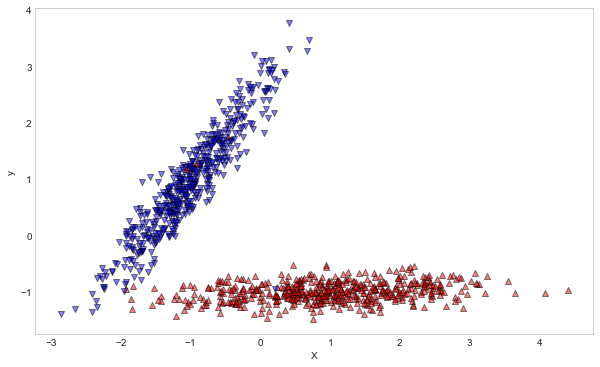

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='^', color='r')
    else:
        ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='v', color='b')
             

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [32]:
model = None
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.99125
평가 데이터 점수: 0.99


In [40]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("CV 점수: {}".format(scores))
print("CV 평균 점수: {}".format(scores.mean()))

CV 점수: [0.98 0.98 0.99 0.99 1.   0.99 1.   0.99 1.   0.98]
CV 평균 점수: 0.99


In [42]:
model.coef_, model.intercept_

(array([[-2.74819395,  3.26896451]]), array([-1.27730364]))

In [77]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
noc = 0.02 # 분류 ㅔlot에서 바탕 구분 화면 정밀도에 사용. 클수록 경계화면이 계단식으로 구분
xx, yy = np.meshgrid(np.arange(x_min, x_max, noc), np.arange(y_min, y_max, noc))

In [78]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\User\AppData\Local\Temp\ipykernel_60008\2179120426.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


(array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

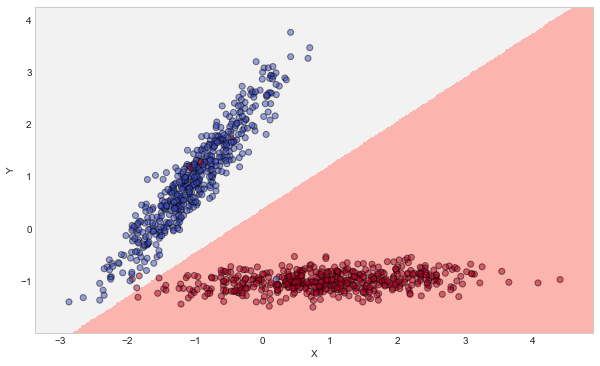

In [79]:
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1], c=np.abs(y-1), edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

## 붓꽃 데이터

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

## 붓꽃 데이터에 대한 로지스틱 회귀

## 유방암 데이터

## 유방암 데이터에 대한 로지스틱 회귀

# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

## 붓꽃 데이터에 대한 SGD 분류

## 유방암 데이터에 대한 SGD 분류